## Predict the pass/fail result of student


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Keyur Chaudhari\Downloads\student_info.csv')

In [4]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
df.shape

(200, 2)

In [6]:
df.size

400

## Discover and  vishualize the data to gain insight

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [9]:
x=df.study_hours
y=df.student_marks

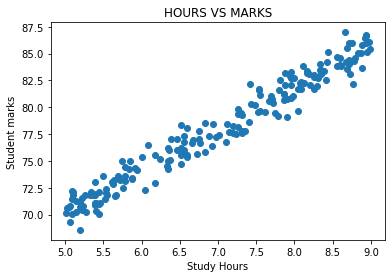

In [10]:
plt.scatter( x , y )
plt.xlabel('Study Hours')
plt.ylabel('Student marks')
plt.title('HOURS VS MARKS')
plt.show()

## prepare data for ML

### Data Cleaning

In [12]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [15]:
m = df.mean()

In [16]:
m

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [21]:
df1 = df.fillna(df.mean())

In [22]:
df1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [23]:
df1.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


### Split Dataset

In [57]:
X = df1.drop('student_marks',axis='columns')
Y = df1.drop('study_hours', axis='columns')

In [58]:
print("shape of x is ",X.shape)
print("shape of Y is ",Y.shape)

shape of x is  (200, 1)
shape of Y is  (200, 1)


In [59]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , Y ,test_size=0.2 ,random_state = 51)

## select model and train it

In [60]:
from sklearn import linear_model

In [61]:
model = linear_model.LinearRegression()

In [62]:
 model.fit(X_train , y_train)

LinearRegression()

In [63]:
model.coef_

array([[3.93571802]])

In [64]:
model.intercept_

array([50.44735504])

In [66]:
model.predict([[4]])[0][0]  // to get actual value from array

66.19022710353573

In [68]:
Y_pred = model.predict(X_test)

In [69]:
Y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [71]:
pd.DataFrame(np.c_[X_test,y_test,Y_pred],columns=["study hours","student marks original","student marks predicted"])

,study hours,student marks original,student marks predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## fine tune our model

In [72]:
model.score(X_test , y_test)

0.9514124242154464

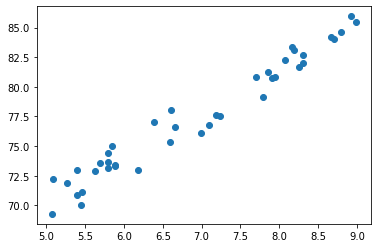

In [73]:
plt.scatter(X_test , y_test)
plt.show()

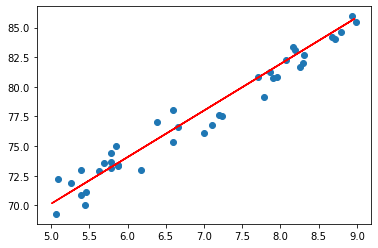

In [76]:
plt.scatter(X_test , y_test)
plt.plot(X_train , model.predict(X_train),color ="red")

# SAVE MODEL

In [77]:
import joblib
joblib.dump(model,"Predict_Marks_Project.pkl")

['Predict_Marks_Project.pkl']

In [78]:
modelFinal = joblib.load("Predict_Marks_Project.pkl")

In [80]:
modelFinal.predict([[5]])

array([[70.12594512]])

#  <------ DONE ------>